In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

games = pd.read_csv('/Users/harryrobinson/Desktop/for coding/games.csv')
print(games.shape)
games.head(5)

(81312, 20)


,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005,2,2,180,180,180,13,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012,2,5,150,60,150,12,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013,1,7,210,30,210,12,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006,2,4,240,240,240,12,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002,2,5,150,90,150,12,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [2]:
#column types
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81312 entries, 0 to 81311
Data columns (total 20 columns):
id                      81312 non-null int64
type                    81312 non-null object
name                    81271 non-null object
yearpublished           81309 non-null float64
minplayers              81309 non-null float64
maxplayers              81309 non-null float64
playingtime             81309 non-null float64
minplaytime             81309 non-null float64
maxplaytime             81309 non-null float64
minage                  81309 non-null float64
users_rated             81312 non-null int64
average_rating          81312 non-null float64
bayes_average_rating    81312 non-null float64
total_owners            81312 non-null int64
total_traders           81312 non-null int64
total_wanters           81312 non-null int64
total_wishers           81312 non-null int64
total_comments          81312 non-null int64
total_weights           81312 non-null int64
average_weight  

In [3]:
# number of nulls per column
games.isnull().sum()

id                       0
type                     0
name                    41
yearpublished            3
minplayers               3
maxplayers               3
playingtime              3
minplaytime              3
maxplaytime              3
minage                   3
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64

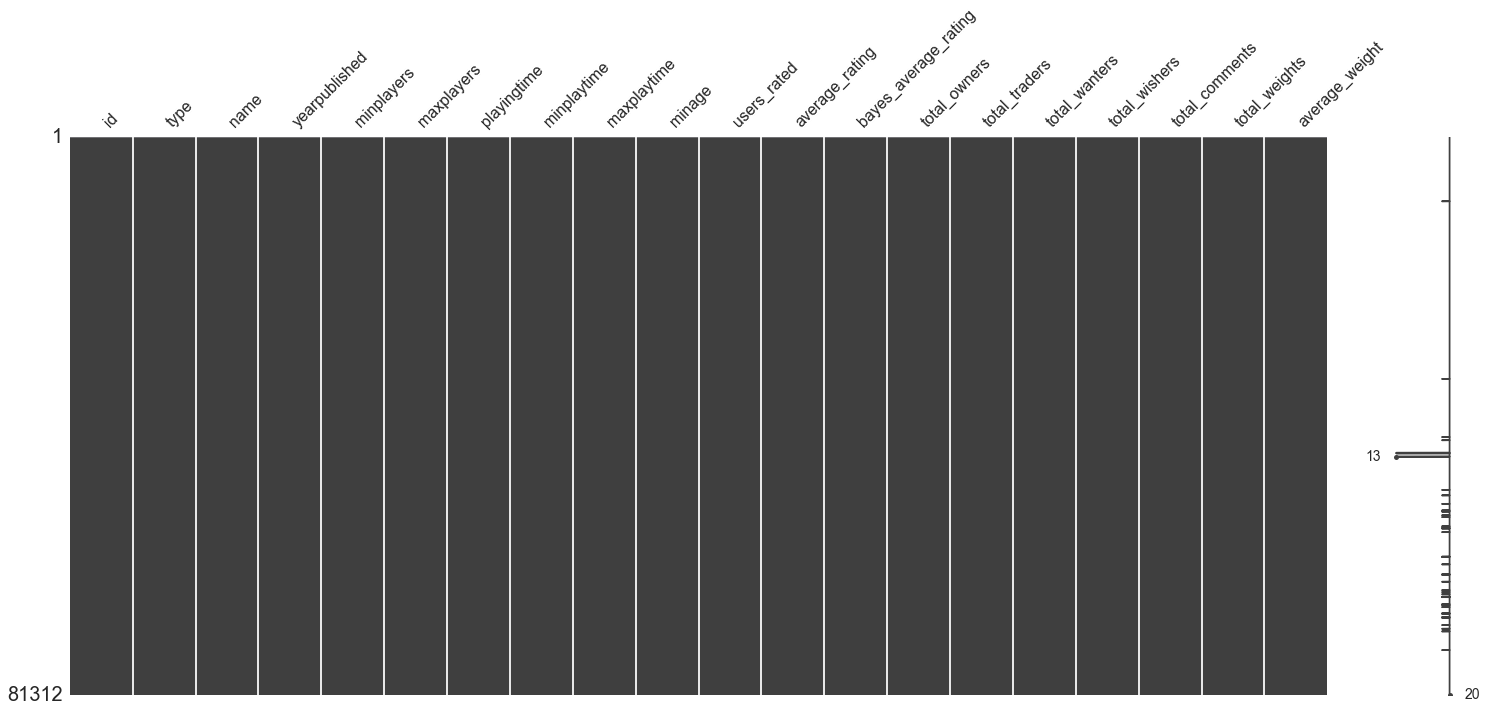

In [4]:
import missingno as msno
%matplotlib inline
# visualise the missing data - although there isn't much of it!
msno.matrix(games)

In [5]:
# drop any rows with NaN values
games = games.dropna()
print(games.shape)

(81268, 20)


In [6]:
# drop rows where game has no reviews
print(len(games[games['users_rated'] == 0]))
games = games[games['users_rated'] != 0]
games.shape

24374


(56894, 20)

(array([   602.,   1231.,   2824.,   5206.,   8223.,  13593.,  13849.,
          8470.,   2224.,    672.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

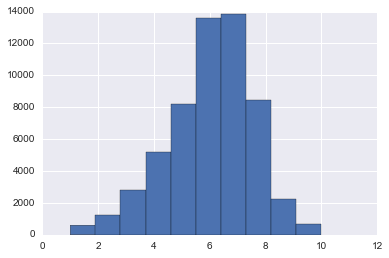

In [13]:
#Visualise the distribution of average ratings
plt.hist(games['average_rating'], bins=10)

In [20]:
# Calculate some basic statistics
import numpy as np

st_dev = np.std(games['average_rating'])
mean = np.mean(games['average_rating'])
print(st_dev)
print(mean)
games.describe()

1.5788160595839211
6.016112849333889


,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000
mean,64092.223943,1874.793089,2.004834,5.572837,59.921503,57.457184,59.921503,7.591556,231.360477,6.016113,1.654372,374.507470,13.166432,18.002689,60.579024,70.344219,23.548722,1.269716
std,57513.253779,486.032042,0.791475,50.773395,406.451917,393.197450,406.451917,4.869533,1364.124459,1.578830,2.646445,1787.003768,46.984706,71.984315,284.161400,338.375579,138.053005,1.213841
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16133.250000,1989.000000,2.000000,2.000000,15.000000,15.000000,15.000000,4.000000,2.000000,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,36921.000000,2005.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,7.000000,6.150000,0.000000,20.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000
75%,118558.750000,2011.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,39.000000,7.040000,5.488240,125.000000,6.000000,6.000000,15.000000,19.000000,5.000000,2.000000
max,184260.000000,2017.000000,40.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


Starting first with a simple metric such as MSE - this will be the squared difference between the predicted value and the actual value.

In [44]:
# Clustering the data to possibly group
from sklearn.cluster import KMeans

#initialise kmeans
kmeans = KMeans(n_clusters = 5)
#k means works only on numeric columns, hence select only numeric columns
numeric_columns = games.select_dtypes(include=[np.number])
numeric_columns = list(numeric_columns.columns)
numeric_columns.remove('id')
#take difference to see which columns were removed, then remove ID also
print(games.columns - numeric_columns)
#fit the clusters with the numeric data above and extract the labels
kmeans.fit(games[numeric_columns])
labels = kmeans.labels_

/Users/harryrobinson/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


Index(['id', 'name', 'type'], dtype='object')
[2 2 2 ..., 1 1 1]


In [48]:
game_mean = games[numeric_columns].apply(np.mean, axis=1)
game_std = games[numeric_columns].apply(np.std, axis=1)
print(game_mean)
print(game_std)

0        3806.296359
1        2662.195541
2        1979.243229
3        2467.201242
4        6360.675421
5        6598.986708
6        2991.732713
7        2655.662206
8        2795.416065
9        2792.273392
10       5580.305755
11       1152.445934
12        992.127904
13       2315.153568
14       2726.683881
15       1621.103150
16       2154.081042
17       1987.930732
18       5953.529588
19       3151.088482
20       1410.825956
21       3237.767121
22       1945.272206
23       4728.205226
24       2294.006601
25       2648.861422
26       1835.704201
27       3403.590974
28       3410.337148
29       2325.574743
            ...     
81134     128.529412
81160     123.411765
81162       6.176471
81176     134.364706
81177     134.364706
81178     134.164706
81179     134.348039
81180     134.348039
81181     134.294118
81184     133.823529
81188     123.588235
81190     134.941176
81192     125.764706
81193     125.558824
81195     122.470588
81198     124.117647
81199     127

In [103]:
#making a df of the clusters and testing shifting them 
a = pd.DataFrame(labels)
a.rename(columns={0: 'clusters'}, inplace=True)
print(a.head(5))
a = a.clusters.shift(-5)
print(a.head(5))

   clusters
0         2
1         2
2         2
3         2
4         3
0    3
1    2
2    2
3    2
4    2
Name: clusters, dtype: float64


/Users/harryrobinson/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


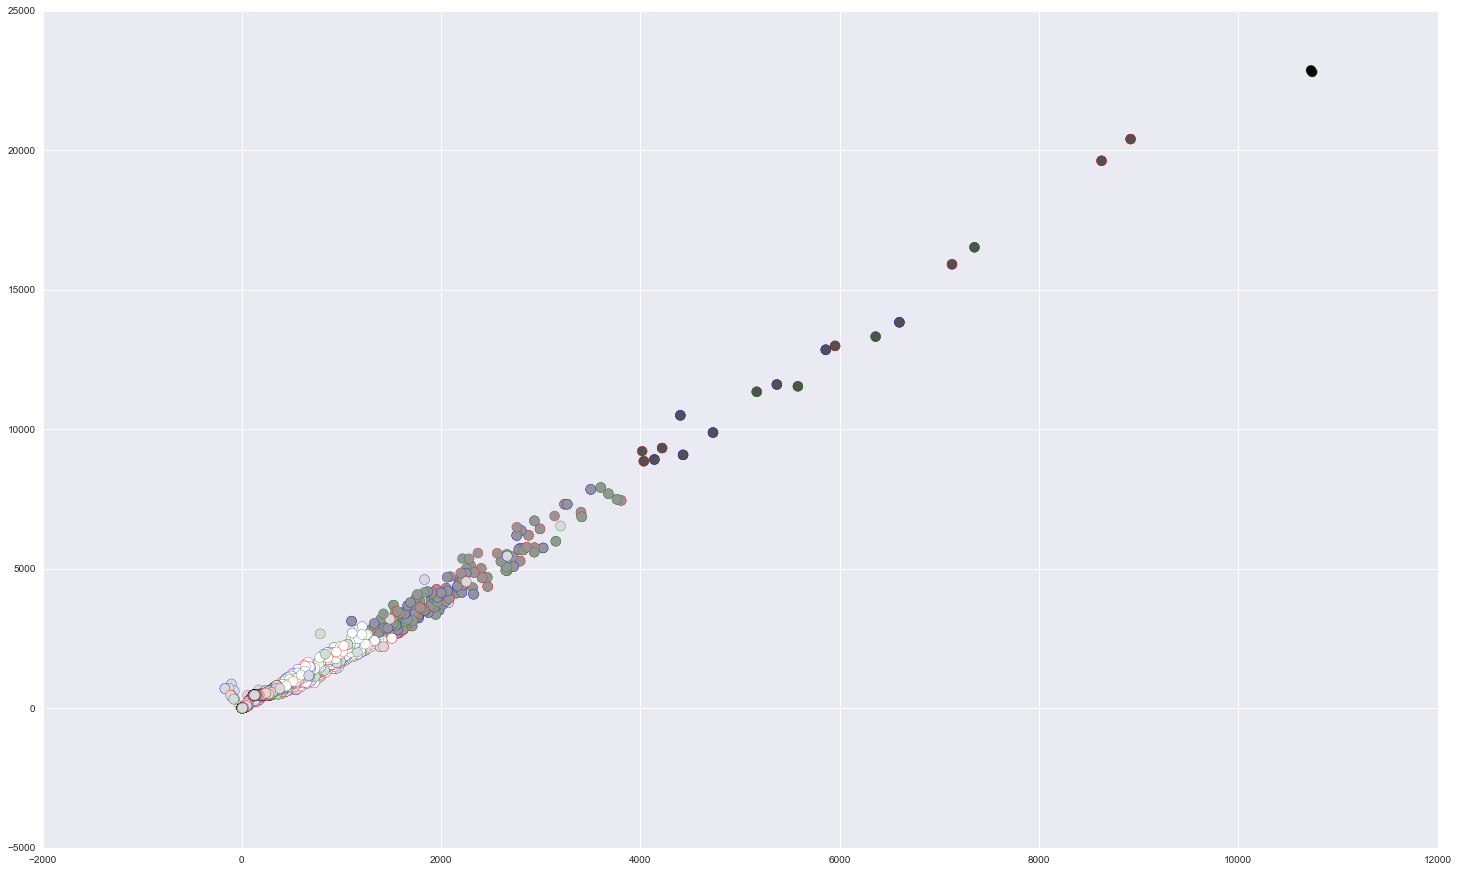

In [75]:
#plt mean vs std deviation to see how the points are clustered
plt.figure(figsize=(25,15))
plt.scatter(x=game_mean, y=game_std, color = 'RGB', c=labels, s=100,)
plt.legend(loc='upper left', prop={'size':40})
plt.show()

In [118]:
#generate all correlations then the correlations with the 'average_rating'
correlations = games[numeric_columns].corr()
correlations["average_rating"]

KeyError: 'average_rating'

In [116]:
#remove the two columns that will cause overfitting
numeric_columns.remove('average_rating')
numeric_columns.remove('bayes_average_rating')

['yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'average_rating',
 'bayes_average_rating',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights']

In [122]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(games[numeric_columns], games['average_rating'])
predictions = reg.predict(games[numeric_columns])
np.mean((predictions - games["average_rating"]) ** 2)

2.248461561029143

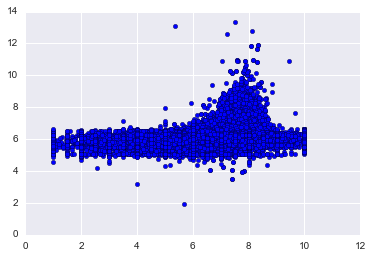

In [133]:
plt.scatter(games["average_rating"], predictions)
plt.show()

43
